<a href="https://colab.research.google.com/github/baa066/PorfolioOptimizer/blob/main/PortfolioOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program attempts to optimize a user's portfolio using the Efficient Frontier & Python.
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Create the fictional portfolio
assets =  ["ANKR-USD", "RVN-USD", "UMA-USD"] #<------Set your Tickers

In [ ]:
# Assign weights to the stocks. Weights must = 1 so 0.25 for each. 
# Example: This means if I had a total of $100 USD in the portfolio, then I would have $25 USD in each stock. 
weights = np.array([0.4,0.3,0.3]) #<------Set your weights
weights

array([0.4, 0.3, 0.3])

In [ ]:
# Get the stock starting date
stockStartDate = '2021-04-01' #<------Set your historical lookback date YYYY-MM-DD

In [ ]:
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
today

'2021-04-21'

In [ ]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Close']

In [ ]:
df

,ANKR-USD,RVN-USD,UMA-USD
Date,,,
2021-03-31,0.168392,0.194041,24.399267
2021-04-01,0.176601,0.193464,25.477434
2021-04-02,0.159970,0.183602,24.819662
2021-04-03,0.169083,0.187631,25.641806
2021-04-04,0.157654,0.195299,26.143251
2021-04-05,0.150154,0.186549,25.295107
2021-04-06,0.137151,0.178388,23.189873
2021-04-07,0.154304,0.185721,24.452158
2021-04-08,0.157898,0.188207,24.670410


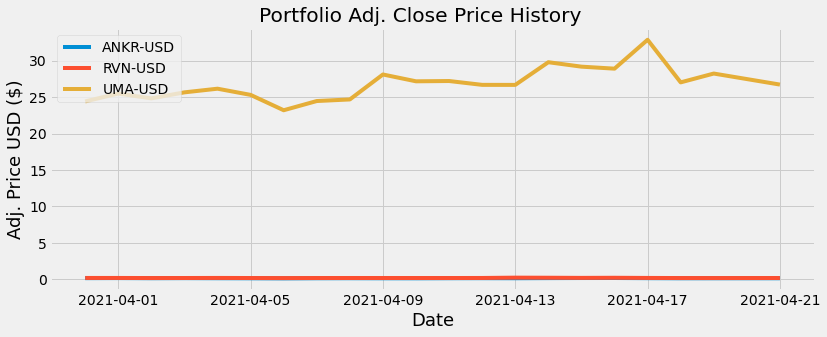

In [ ]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '

# Get the stocks
my_stocks = df

# Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
# Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,ANKR-USD,RVN-USD,UMA-USD
Date,,,
2021-03-31,NaN,NaN,NaN
2021-04-01,0.048749,-0.002974,0.044188
2021-04-02,-0.094173,-0.050976,-0.025818
2021-04-03,0.056967,0.021944,0.033125
2021-04-04,-0.067594,0.040867,0.019556
2021-04-05,-0.047573,-0.044803,-0.032442
2021-04-06,-0.086598,-0.043747,-0.083227
2021-04-07,0.125066,0.041107,0.054433
2021-04-08,0.023292,0.013386,0.008926


In [ ]:
# To show the annualized co-variance matrix we must multiply the co-variance matrix by the number of trading days for the current year. 
# In this case the number of trading days will be 252 for this year
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,ANKR-USD,RVN-USD,UMA-USD
ANKR-USD,1.269625,0.156309,0.331199
RVN-USD,0.156309,1.264566,0.006007
UMA-USD,0.331199,0.006007,1.381498


In [ ]:
# Now calculate and show the portfolio variance using the formula:
# Expected portfolio variance = WT * (Covariance Matrix) * W
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.5593690765294833

In [ ]:
# Now calculate and show the portfolio volatility using the formula:
# Expected portfolio volatility = SQRT (WT * (Covariance Matrix) * W)
# Don’t forget the volatility (standard deviation) is just the square root of the variance.
port_volatility = np.sqrt(port_variance)
port_volatility

0.7479098050764432

In [ ]:
# Calculate the portfolio annual simple return.
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3368275096218557

In [ ]:
# Show the expected annual return, volatility or risk, and variance.
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 34.0%
Annual volatility/standard deviation/risk : 75.0%
Annual variance : 56.00000000000001%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
# Import PyPortfolioOpt libs
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [ ]:
# Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('ANKR-USD', 0.0), ('RVN-USD', 0.0), ('UMA-USD', 1.0)])
Expected annual return: 212.4%
Annual volatility: 117.5%
Sharpe Ratio: 1.79


(2.12380684560419, 1.1753715696151843, 1.7899078895476215)

In [ ]:
pip install pulp

In [ ]:
# How much, how many should I buy?
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000) #<------Set your portfolio value or amount to invest
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'UMA-USD': 374}
Funds remaining: $11.30
